## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv(r"C:\Users\labbo\OneDrive\Desktop\BootTuwaiq\week3\Usecase-7\cleaned_data.csv")

In [3]:
df.shape

(3188, 19)

In [6]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,0.0,2788,0,0,1,800000,800000
1,Manchester United,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,0.0,0.0,0.0,0.0,3512,0,0,1,800000,800000


In [5]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [5]:
# uniqeness
#df.drop_duplicates(inplace=True)
#df[df.duplicated()]

In [6]:
# Completeness
#df.isnull().sum()

In [7]:
# Accurecy types
#df.dtypes

In [8]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
#categorical_features = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']
#numeric_features = ['Year', 'Engine_Size', 'Mileage']

In [9]:
#for i in categorical_features:
    #print(df[i].value_counts())

In [10]:
# Calculate the frequency of each 'Type'
#type_counts = df['Type'].value_counts()

# Filter 'Type' values that appear 10 or more times
#df = df[df['Type'].isin(type_counts[type_counts >= 2].index)]

In [11]:
#df.head(2)

In [12]:
#df.shape

In [13]:
# Calculate the frequency of each 'Make'
#make_counts = df['Make'].value_counts()

# Filter 'Type' values that appear 10 or more times
#df = df[df['Make'].isin(make_counts[make_counts >=2].index)]

In [7]:
categorical_features = ['team', 'position']
numeric_features = ['highest_value', 'current_value', 'games_injured','days_injured','minutes played','clean sheets','goals conceded','red cards','second yellow cards','yellow cards','assists','goals','appearance','age','height']

In [15]:
#df[df['Type']=='Other']
#df['highest_value']

In [16]:
#for i in numeric_features:
    #plt.hist(df[i]);
    #plt.title(i)
    #plt.show()

In [17]:
#df.shape

In [18]:
#df = df[df['Year']>=1999]

In [19]:
#df.shape

In [20]:
#plt.figure(figsize=(15,8))
#plt.hist(df['Price']);
#plt.hist(df[(df['Price']<=300000) & (df['Price']>5000)]['Price'], bins=100);
#plt.hist(df[(df['Price']<=400000) & (df['Price']>=5000)]['Price'], bins=100);

In [21]:
#df = df[(df['Price']<=300000) & (df['Price']>=5000)]

In [22]:
#df.shape

In [23]:
#df[df['Mileage']<1000]

In [24]:
#df['Mileage'].min()

In [25]:
#plt.figure(figsize=(15,8))
#plt.hist(df['Mileage']);
#+plt.hist(df[(df['Mileage']<=450000) & (df['Mileage']>1000)]['Mileage'], bins=100);
#plt.hist(df['Mileage'], bins=100);

In [26]:
#df = df[(df['Mileage']<=450000) & (df['Mileage']>1000)]
#df.shape

In [9]:
df.drop(columns='games_injured',inplace=True)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [10]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,award,current_value,highest_value
0,Manchester United,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,0.0,2788,0,1,800000,800000
1,Manchester United,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,0.0,0.0,0.0,0.0,3512,0,1,800000,800000


In [12]:
categorical_features

['team', 'position']

In [11]:
df.shape

(3188, 17)

In [17]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [18]:
df.shape

(3188, 361)

In [13]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,award,current_value,highest_value
0,Manchester United,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,0.0,2788,0,1,800000,800000
1,Manchester United,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,0.0,0.0,0.0,0.0,3512,0,1,800000,800000


In [14]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,award,current_value,highest_value
0,Manchester United,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,0.0,2788,0,1,800000,800000
1,Manchester United,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,0.0,0.0,0.0,0.0,3512,0,1,800000,800000


#### 3. Feature selection

In [35]:
# sns.heatmap(df.corr(), annot=True);

In [19]:
correlation = df.corr()


In [20]:
print(correlation['current_value'].sort_values(ascending=False))

current_value              1.000000
highest_value              0.287821
appearance                 0.259073
minutes played             0.243684
assists                    0.140554
                             ...   
team_Macarthur FC         -0.062529
team_Marumo Gallants FC   -0.068204
team_SV Ried              -0.070858
position_Attack           -0.077891
team_Royal AM FC          -0.079646
Name: current_value, Length: 361, dtype: float64


In [21]:
# Set the correlation threshold
threshold = 0.25 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'current_value', 'highest_value'], dtype='object')

In [22]:
selected_features = ['appearance', 'current_value', 'highest_value']

In [23]:
df['highest_value']

0        800000
1        800000
2        200000
3        500000
4       7500000
         ...   
3183     200000
3184      75000
3185     300000
3186      50000
3187      50000
Name: highest_value, Length: 3188, dtype: int64

In [24]:
df = df[selected_features]
df.head()

,appearance,current_value,highest_value
0,39,800000,800000
1,51,800000,800000
2,46,200000,200000
3,38,500000,500000
4,62,800000,7500000


#### 4. Prepare train and test data

In [25]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X.shape

(3188, 2)

## Buliding the Model

In [27]:
model = LinearRegression()

## Train the Model

In [28]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [29]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [30]:
model.coef_

array([112120.8164252 , 122620.51738748])

In [31]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,112120.816425
highest_value,122620.517387


In [32]:
print(model.intercept_) 

670049.0196078431


In [33]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

NameError: name 'lasso_model' is not defined

## Evaluating the Model 

1. Mean Square Error

In [34]:
y_base = [y_train.mean()] * len(y_test)

In [35]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 216034316128.41217


In [36]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 184273312709.4461
Mean Squared Error for testing: 188376732178.54184


2. Mean Absolute Error

In [37]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 386152.49861700163


In [38]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 345448.9619323126
Mean Absolute Error for testing: 354050.358482014


3. Root Mean Squared Error

In [39]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 621.4116981655573


In [40]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 429270.67534301255
Root Mean Squared Error for testing: 434023.8843411061


4. R Square

In [41]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.14009256979415452
R Square for testing: 0.12654773533685626


#### Predictions vs. Real Values

In [42]:
predictions = model.predict(X_test_scaled)
#predictions

In [43]:
Real_Values = np.array(y_test)
#Real_Values

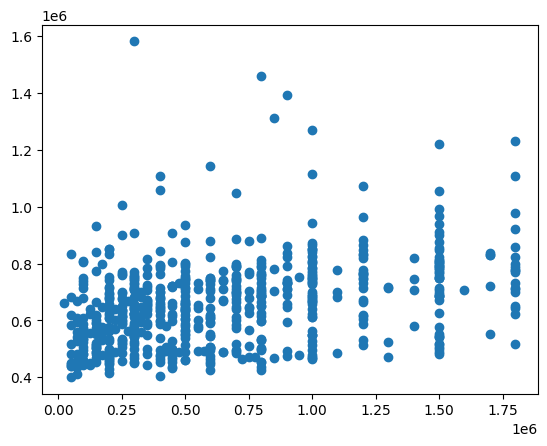

In [44]:
plt.scatter(Real_Values,predictions);  v

#### Residual Histogram

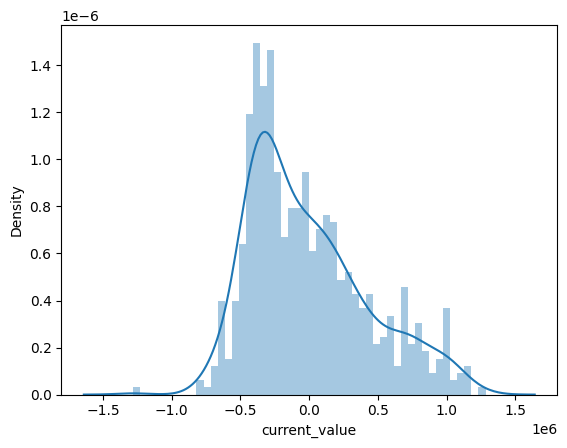

In [45]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

In [ ]:
#v_V